In [1]:
from google.colab import files
uploaded = files.upload()


Saving College_Event_Feedback_Task3.csv to College_Event_Feedback_Task3.csv


In [2]:
import pandas as pd

df = pd.read_csv("College_Event_Feedback_Task3.csv")
df.head()


,Student Name,Department,Date,Rating,Feedback
0,Student_1,CSE,19/01/2024,4,"Amazing experience, learned a lot."
1,Student_2,IT,18/01/2024,2,Average event.
2,Student_3,ECE,05/02/2024,1,Too boring and disorganized.
3,Student_4,EEE,29/01/2024,2,Some sessions were useful.
4,Student_5,IT,23/02/2024,4,Very informative and fun!


In [3]:
!pip install textblob
from textblob import TextBlob


In [4]:
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity == 0:
        return "Neutral"
    else:
        return "Negative"

df["Sentiment"] = df["Feedback"].apply(get_sentiment)
df.head()


,Student Name,Department,Date,Rating,Feedback,Sentiment
0,Student_1,CSE,19/01/2024,4,"Amazing experience, learned a lot.",Positive
1,Student_2,IT,18/01/2024,2,Average event.,Negative
2,Student_3,ECE,05/02/2024,1,Too boring and disorganized.,Negative
3,Student_4,EEE,29/01/2024,2,Some sessions were useful.,Positive
4,Student_5,IT,23/02/2024,4,Very informative and fun!,Positive


In [5]:
df["Sentiment"].value_counts()


,count
Sentiment,
Positive,32
Negative,17
Neutral,1


In [6]:
df.groupby("Sentiment")["Rating"].mean()


,Rating
Sentiment,
Negative,2.058824
Neutral,2.000000
Positive,3.437500


In [7]:
df.groupby("Department")["Rating"].mean()


,Rating
Department,
CSE,3.111111
Civil,2.900000
ECE,2.600000
EEE,2.555556
IT,2.875000
ME,3.444444


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt


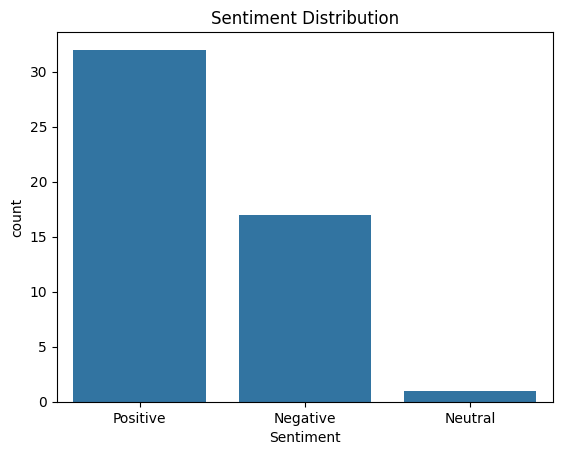

In [9]:
sns.countplot(x="Sentiment", data=df)
plt.title("Sentiment Distribution")
plt.show()


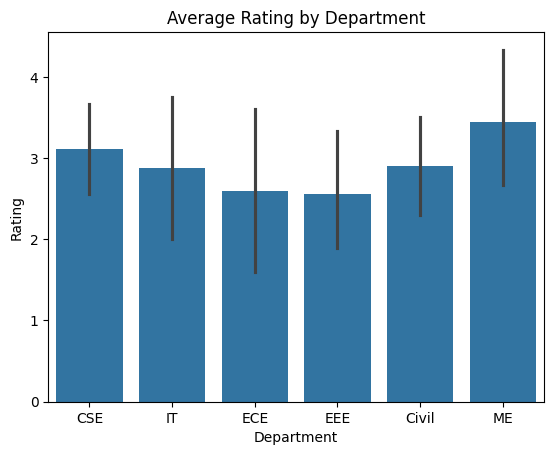

In [10]:
sns.barplot(x="Department", y="Rating", data=df)
plt.title("Average Rating by Department")
plt.show()


In [11]:
df.to_csv("Feedback_With_Sentiment.csv", index=False)
from google.colab import files
files.download("Feedback_With_Sentiment.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>